In [3]:
from google.colab import drive

# Mount Google Drive to /content/drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = "/content/drive/MyDrive/carcrash_cleaned_data2.csv"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [7]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [8]:
#loading the data
df = pd.read_csv("/content/drive/MyDrive/carcrash_cleaned_data2.csv")


In [9]:
#printing first 5 rows
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,LANE_CNT,SEVERE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,WORK_ZONE_I,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,HOUR,DAY_OF_WEEK,MONTH,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_LANE USE MARKING,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE,TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FALSHER,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN/OTHER,TRAFFIC_CONTROL_DEVICE_YIELD,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN/OTHER,...,ALIGNMENT_STRAIGHT ON HILLCREST,SEASON_Spring,SEASON_Summer,SEASON_Fall,ROAD_DEFECT_NO DEFECTS,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN/OTHER,ROAD_DEFECT_WORN SURFACE,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,PRIM_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,PRIM_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,PRIM_CONTRIBUTORY_CAUSE_TEXTING,PRIM_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",PRIM_CONTRIBUTORY_CAUSE_WEATHER
0,2023-08-18 12:50:00,15,0.0,1,0,0,0,0,2,1.0,0.0,0.0,1.0,0.0,1.0,12,6,8,12,4,8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,F

In [10]:
#checking the shapeof dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881316 entries, 0 to 881315
Columns: 139 entries, CRASH_DATE to PRIM_CONTRIBUTORY_CAUSE_WEATHER
dtypes: bool(118), float64(7), int64(13), object(1)
memory usage: 240.4+ MB


In [11]:
#checking for the nullvalues
df.isna().sum()

,0
CRASH_DATE,0
POSTED_SPEED_LIMIT,0
LANE_CNT,0
SEVERE,0
INTERSECTION_RELATED_I,0
...,...
PRIM_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,0
PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,0
PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),0
"PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",0


In [12]:
#dropping the columns
# Check if the columns exist before dropping
columns_to_drop = ['Unnamed: 0', 'CRASH_DATE']
existing_columns = df.columns

for column in columns_to_drop:
  if column in existing_columns:
    df.drop(columns=[column], axis=1, inplace=True)
  else:
    print(f"Column '{column}' not found in DataFrame. Skipping.")

Column 'Unnamed: 0' not found in DataFrame. Skipping.


In [13]:
#importing skitlearn modulus
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [14]:
# Define X and y
y = df['SEVERE']
X = df.drop(columns=['SEVERE'], axis=1)

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

SEVERE
0    483315
1    177672
Name: count, dtype: int64 

 SEVERE
0    161125
1     59204
Name: count, dtype: int64


In [16]:
# Creating the classifier, fit it on the training data and make predictions on the test set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e10)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0)

In [17]:
logreg_results = logreg.predict(X_test)

In [18]:
print("f1 score Train:",metrics.f1_score(y_train, logreg.predict(X_train)))
print("f1 score  Test:",metrics.f1_score(y_test, logreg_results))

f1 score Train: 0.7564654258356035
f1 score  Test: 0.7569967338796425


In [19]:
print("Accuracy :",metrics.accuracy_score(y_test, logreg_results))

Accuracy : 0.8872141207013149


In [20]:
#printing classifiction report of logistic regression
print(classification_report(y_test, logreg_results))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93    161125
           1       0.90      0.65      0.76     59204

    accuracy                           0.89    220329
   macro avg       0.89      0.81      0.84    220329
weighted avg       0.89      0.89      0.88    220329



In [21]:
#printing the confusion matrix of Logistic regression
print(confusion_matrix(y_test,logreg_results ))

[[156773   4352]
 [ 20498  38706]]


In [22]:
#SMOTE to handle class imbalance
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [23]:
# Fit SMOTE to training data
sm = SMOTE(random_state=42)

In [24]:
#Resampling the X and y using SMOTE
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [25]:
# Preview synthetic sample class distribution
print(y_resampled.value_counts())

SEVERE
0    483315
1    483315
Name: count, dtype: int64


In [26]:
# Split resampled data into training and test sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,
                                                                             y_resampled)

In [ ]:
print(y_resampled_train.value_counts(),'\n\n', y_resampled_test.value_counts())

SEVERE
0    362486
1    362486
Name: count, dtype: int64 

 SEVERE
0    120829
1    120829
Name: count, dtype: int64


In [27]:
#Logistic with SMOTE class balanced
# Creating the logistic regression with resmapled datasets, fit it on the training data and make predictions on the test set
logreg.fit(X_resampled_train, y_resampled_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0)

In [ ]:
logreg_resampled_results = logreg.predict(X_resampled_test)

In [ ]:
logreg_results_test = logreg.predict(X_test)

In [ ]:
print("f1 score Train:",metrics.f1_score(y_resampled_train, logreg.predict(X_resampled_train)))
print("f1 score of resampled test:",metrics.f1_score(y_resampled_test, logreg_resampled_results))
print("f1 score Test :",metrics.f1_score(y_test, logreg_results_test))
print("Accuracy :",metrics.accuracy_score(y_test, logreg_results_test))

f1 score Train: 0.8713197423678164
f1 score of resampled test: 0.8726175726820659
f1 score Test : 0.7295726091291637
Accuracy : 0.8547444957313836


In [ ]:
#printing calssifiction report of logistic regression resampled
print(classification_report(y_test, logreg_results_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    161125
           1       0.73      0.73      0.73     59204

    accuracy                           0.85    220329
   macro avg       0.82      0.82      0.82    220329
weighted avg       0.85      0.85      0.85    220329



In [ ]:
#printing the confusion matrix of resampled logistic regression
print(confusion_matrix(y_test, logreg_results_test ))

[[149237  11888]
 [ 17320  41884]]


In [28]:
#KNN MODEL
#importing the skitlearn module of KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Creating the KNN classifier, fit it on the training data and make predictions on the test set
knn_default = KNeighborsClassifier()

In [30]:
knn_default.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_results= knn_default.predict(X_test)

In [ ]:
print("f1 score Train:",metrics.f1_score(y_train, knn_default.predict(X_train)))
print("f1 score  Test:",metrics.f1_score(y_test, knn_results))
print("Accuracy :",metrics.accuracy_score(y_test, knn_results))

In [10]:
#Decision Trees class weight balanced
#importing the sci-kitlearn modulus of decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [11]:
# Creating the Decision Tree classifier, fit it on the training data and make predictions on the test set
dtree_default = DecisionTreeClassifier(class_weight='balanced')

In [16]:
dtree_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [17]:
dtree_results= dtree_default.predict(X_test)

In [18]:
dtree_results= dtree_default.predict(X_test)

In [19]:
print("f1 score Train:",metrics.f1_score(y_train, dtree_default.predict(X_train)))
print("f1 score Test :",metrics.f1_score(y_test, dtree_results))
print("Accuracy :",metrics.accuracy_score(y_test, dtree_results))

f1 score Train: 0.9936569492360079
f1 score Test : 0.6967947971590626
Accuracy : 0.8345292721339451


In [20]:
#Printing the confusion matrix of Decision Tree
print(confusion_matrix(y_test, dtree_results))

[[141979  19146]
 [ 17312  41892]]


In [21]:
#Printing the classification report of Decision Tree
print(classification_report(y_test, dtree_results))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89    161125
           1       0.69      0.71      0.70     59204

    accuracy                           0.83    220329
   macro avg       0.79      0.79      0.79    220329
weighted avg       0.84      0.83      0.84    220329



In [22]:
#Decision Tree model using a Smote class balance
# Creating the Decision Tree with resampled data, fit it on the training data and make predictions on the test set
dtree_resampled = DecisionTreeClassifier()

In [34]:
dtree_resampled.fit(X_resampled_train, y_resampled_train)

DecisionTreeClassifier()

In [ ]:
dtree_resampled_results =  dtree_resampled.predict(X_resampled_test)

In [ ]:
dtree_test_results = dtree_resampled.predict(X_test)

In [ ]:
print("f1 score Train:",metrics.f1_score(y_resampled_train, dtree_resampled.predict(X_resampled_train)))
print("f1 score of resampled Test :",metrics.f1_score(y_resampled_test, dtree_resampled_results))
print("f1 score Test:",metrics.f1_score(y_test, dtree_test_results))
print("Accuracy :",metrics.accuracy_score(y_test, dtree_test_results))

f1 score Train: 0.9979496285168703
f1 score of resampled Test : 0.8818350990629789
f1 score Test: 0.6961960977209378
Accuracy : 0.8318060718289467


In [ ]:
#printing the confusion matrix of the Decision Tree resampled data
print(confusion_matrix(y_test, dtree_test_results))

[[140810  20315]
 [ 16743  42461]]


In [ ]:
#Printing the classifiction report of Decision Tree  resampled data
print(classification_report(y_test, dtree_test_results))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88    161125
           1       0.68      0.72      0.70     59204

    accuracy                           0.83    220329
   macro avg       0.79      0.80      0.79    220329
weighted avg       0.84      0.83      0.83    220329



In [35]:
#Decision Tree with Grid Search
# Creating the Decision tree with Grid Search and reasmpled data
from sklearn.model_selection import GridSearchCV
dtree_param_grid = {
    'max_depth' : [ 7,9],
    'min_samples_leaf' : [2, 5],
    'min_samples_split' : [2, 5 ],
    'class_weight' : ['balanced']
}

In [36]:
dtree_grid = GridSearchCV(estimator= DecisionTreeClassifier(),
                          param_grid=dtree_param_grid, scoring = 'recall')

In [37]:
dtree_grid.fit(X_resampled_train, y_resampled_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [7, 9],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring='recall')

In [38]:
#printing the best parameters of the GridSearch Decision Tree model resampled data
dtree_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [39]:
dtree_grid_res_resam_test = dtree_grid.predict(X_resampled_test)

In [40]:
dtree_grid_results_test = dtree_grid.predict(X_test)

In [41]:
print("f1 score Train:",metrics.f1_score(y_resampled_train, dtree_grid.predict(X_resampled_train)))
print("f1 score resampled Test: ",metrics.f1_score(y_resampled_test, dtree_grid_res_resam_test))
print("f1 score Test:",metrics.f1_score(y_test, dtree_grid_results_test))
print("Accuracy :",metrics.accuracy_score(y_test, dtree_grid_results_test))

f1 score Train: 0.8341355253907307
f1 score resampled Test:  0.8333354747251523
f1 score Test: 0.7186650896653134
Accuracy : 0.8402207607713919


In [42]:
#Printing the confusion Matrix of the GridSearch Decsion Tree resampled data
print(confusion_matrix(y_test, dtree_grid_results_test))

[[140161  20964]
 [ 14240  44964]]


In [43]:
#Printing the clssification matrix of GridSearch Decision Tree resampled data
print(classification_report(y_test, dtree_grid_results_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89    161125
           1       0.68      0.76      0.72     59204

    accuracy                           0.84    220329
   macro avg       0.79      0.81      0.80    220329
weighted avg       0.85      0.84      0.84    220329



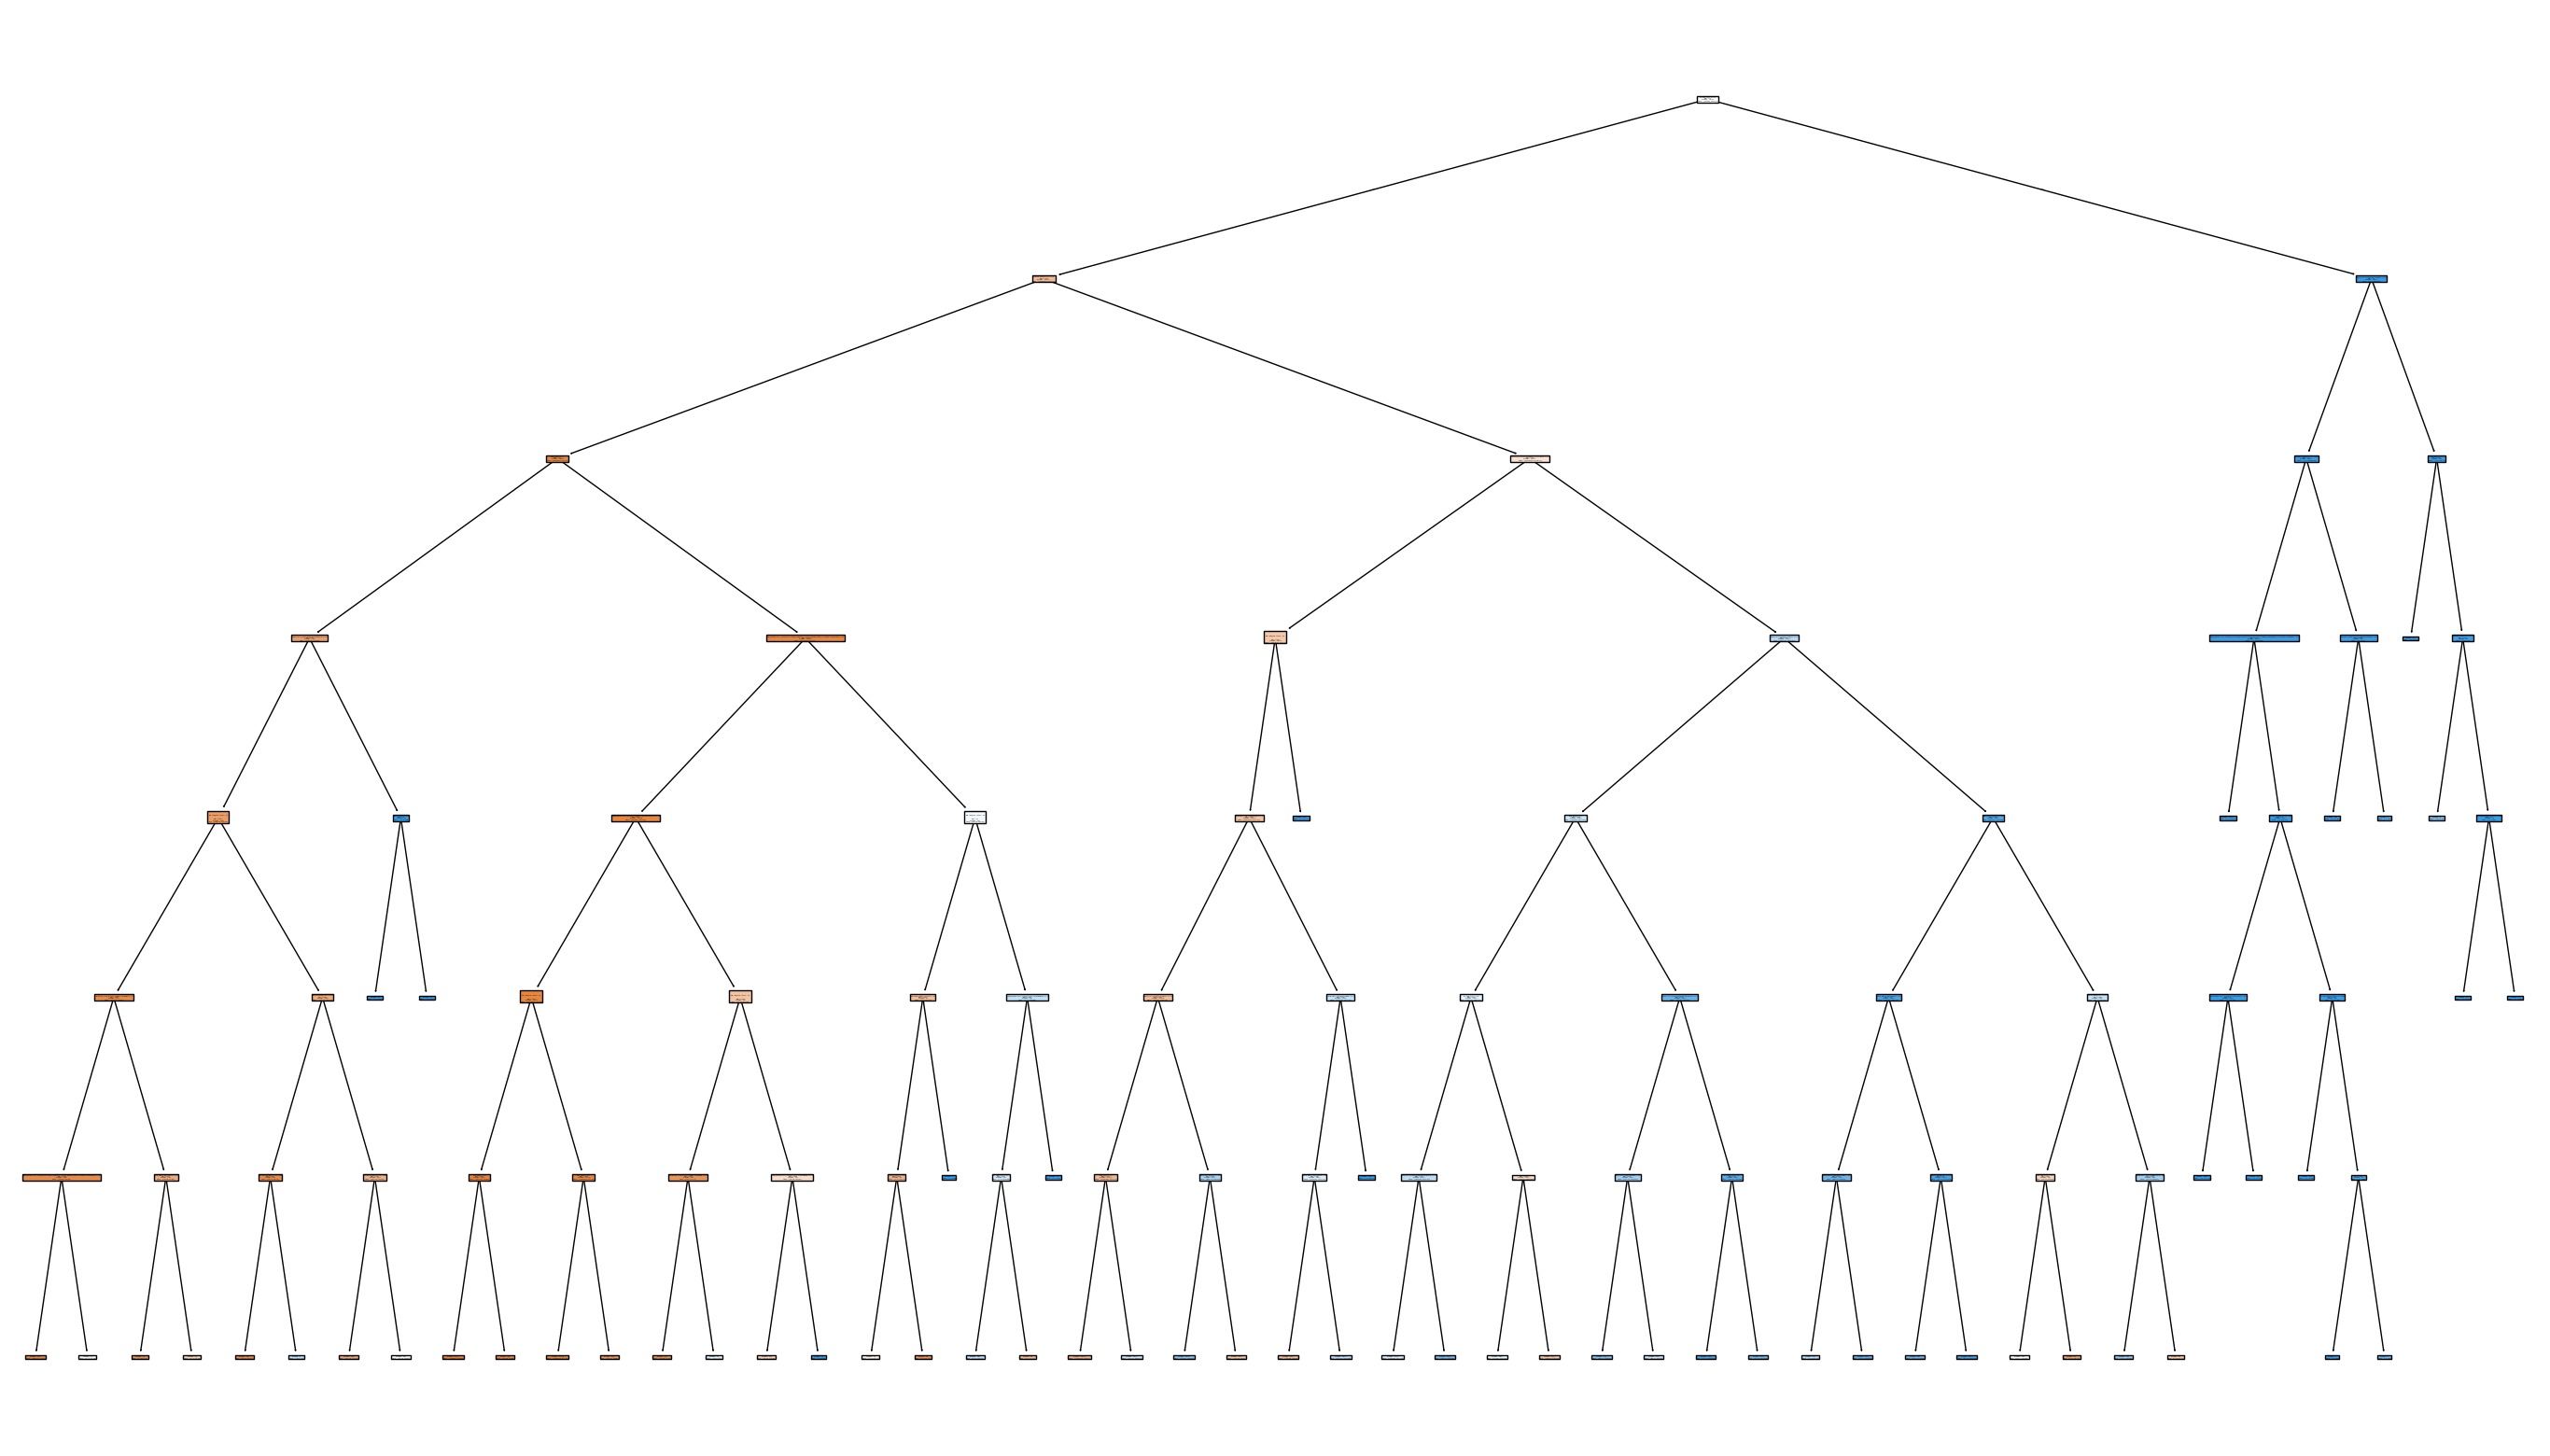

In [ ]:
#Plotting the tree of GridSearch DecisionTree of resampled data
fig = plt.figure(figsize=(35,20))
_ = plot_tree(dtree_grid.best_estimator_,
                   feature_names=X.columns,
                   filled=True)

In [44]:
#Random Forest
#importing skitlearn module for Random Forest classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [45]:
# Instantiate and fit a RandomForestClassifier
rfc= RandomForestClassifier(class_weight = 'balanced', n_estimators=100,
                            random_state = 42, max_depth= 5,)

In [46]:
rfc_default = rfc.fit(X_train, y_train)

In [ ]:
rfc_results = rfc_default.predict(X_test)

In [ ]:
print("f1 score Train:",metrics.f1_score(y_train, rfc_default.predict(X_train)))
print("f1 score Test: ",metrics.f1_score(y_test, rfc_results))
print("Accuracy :",metrics.accuracy_score(y_test, rfc_results))

f1 score Train: 0.7510643021942485
f1 score Test:  0.7506874161834654
Accuracy : 0.8827163015308924


In [ ]:
#printing the confusion matrix of Random Forestof resampled data
print(confusion_matrix(y_test, rfc_results))

[[155584   5541]
 [ 20300  38904]]


In [ ]:
#printing the classification report of Random Forest resampled data
print(classification_report(y_test, rfc_results))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92    161125
           1       0.88      0.66      0.75     59204

    accuracy                           0.88    220329
   macro avg       0.88      0.81      0.84    220329
weighted avg       0.88      0.88      0.88    220329



In [47]:
#Random Forest with SMOTE and class weight balanced
# Instantiate and fit a RandomForestClassifier
rfc= RandomForestClassifier(class_weight = 'balanced', n_estimators=100,
                            random_state = 42, max_depth= 5,)

In [48]:
rfc_resampled = rfc.fit(X_resampled_train, y_resampled_train)

In [ ]:
rfc_resampled_results = rfc.predict(X_resampled_test)

In [ ]:
rfc_results_test = rfc.predict(X_test)

In [ ]:
print("f1 score Train:",metrics.f1_score(y_resampled_train, rfc.predict(X_resampled_train)))
print("f1 score resampled Test: ",metrics.f1_score(y_resampled_test, rfc_resampled_results))
print("f1 score of Test : ",metrics.f1_score(y_test,rfc_results_test))
print("Accuracy :",metrics.accuracy_score(y_test, rfc_results_test))

f1 score Train: 0.8098539565369564
f1 score resampled Test:  0.8095543106250358
f1 score of Test :  0.7386900213562178
Accuracy : 0.8789355917741196


In [ ]:
#printing the confusion matrix of Random Forestof resampled data
print(confusion_matrix(y_test, rfc_results_test))

[[155953   5172]
 [ 21502  37702]]


In [ ]:
#printing the classification report of Random Forest resampled data
print(classification_report(y_test, rfc_results_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92    161125
           1       0.88      0.64      0.74     59204

    accuracy                           0.88    220329
   macro avg       0.88      0.80      0.83    220329
weighted avg       0.88      0.88      0.87    220329



In [ ]:
#Random Forest with Grid Search
rfc_params = {
    'n_estimators': [200,300],
    'max_depth': [3,7],
    'max_features': [0.6, 0.7],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']}

In [55]:
rfc_grid = GridSearchCV(estimator= RandomForestClassifier(),
                          param_grid=rfc_params, scoring = 'recall')

In [56]:
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 7],
                         'max_features': [0.6, 0.7],
                         'n_estimators': [200, 300]},
             scoring='recall')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 7],
                         'max_features': [0.6, 0.7],
                         'n_estimators': [200, 300]},
             scoring='recall')

In [ ]:
rfc_grid.fit(X_train, y_train)

In [ ]:
#printing the best parameters of the GridSearch Decision Tree model resampled data
rfc_grid.best_params_

In [ ]:
rfc_grid_results = rfc_grid.predict(X_test)

In [ ]:
print("f1 score Train:",metrics.f1_score(y_train, rfc_grid.predict(X_train)))
print("f1 score Test: ",metrics.f1_score(y_test, rfc_grid_results))
print("Accuracy :",metrics.accuracy_score(y_test, rfc_grid_results))

In [ ]:
#printing the confusion matrix of Random Forestof resampled data
print(confusion_matrix(y_test, rfc_grid_results))

In [ ]:
#printing the classification report of Random Forest resanpled data
print(classification_report(y_test, rfc_grid_results))

In [ ]:
#Pipeline with StandardScaler and Logisitic Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# Build a pipeline with StandardScaler and logistic Regression
logreg_pipeline = Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(solver='liblinear', fit_intercept=False, random_state=42))])

In [ ]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, random_state=42,
                                    solver='liblinear'))])

In [ ]:
logreg_pipeline_results =  logreg_pipeline.predict(X_test)

In [ ]:
print("f1 score Train:",metrics.f1_score(y_train, logreg_pipeline.predict(X_train)))
print("f1 score Test: ",metrics.f1_score(y_test, logreg_pipeline_results))
print("Accuracy :",metrics.accuracy_score(y_test, logreg_pipeline_results))

f1 score Train: 0.7627925801892489
f1 score Test:  0.7623133049311983
Accuracy : 0.8898510863299883


In [ ]:
print(confusion_matrix(y_test, logreg_pipeline_results))

[[157142   3983]
 [ 20286  38918]]


In [ ]:
print(classification_report(y_test, logreg_pipeline_results))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    161125
           1       0.91      0.66      0.76     59204

    accuracy                           0.89    220329
   macro avg       0.90      0.82      0.85    220329
weighted avg       0.89      0.89      0.88    220329



In [ ]:
#Model Decision Tree(SMOTE class balance)
#printing the sorted feature ranking of Decision Tree resampled data
importances= dtree_resampled.feature_importances_
indices = np.argsort(importances)[::-1]
x_value =[]
y_value = []

for f in range(X_resampled.shape[1]):
    print(X_resampled.columns[indices[f]], "  -  ", importances[indices[f]])
    x_value.append( X_resampled.columns[indices[f]])
    y_value.append( importances[indices[f]])

INJURIES_TOTAL   -   0.3807709687466342
DAMAGE_OVER $1,500   -   0.0946463302294614
INJURIES_NO_INDICATION   -   0.03222904057356376
LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD   -   0.027675504529465902
CRASH_HOUR   -   0.02734660650664353
HOUR   -   0.02350884134353414
DAY_OF_WEEK   -   0.01871240191998043
MONTH   -   0.018676895431587515
CRASH_MONTH   -   0.01865726940483764
CRASH_DAY_OF_WEEK   -   0.01807190065878621
FIRST_CRASH_TYPE_FIXED OBJECT   -   0.016345223644035452
NUM_UNITS   -   0.01569617951696319
POSTED_SPEED_LIMIT   -   0.015299784144024359
PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY   -   0.013211651303946007
TRAFFICWAY_TYPE_NOT DIVIDED   -   0.011907817863053418
LANE_CNT   -   0.011543906622948205
PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE   -   0.011237932090331875
DAMAGE_$501 - $1,500   -   0.01087617120225439
ROAD_DEFECT_UNKNOWN/OTHER   -   0.010189724371406094
PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS   -   0.010044188656225448
HIT_AND_RUN_I  

Text(0.5, 1.0, 'Top 15 Important Features')

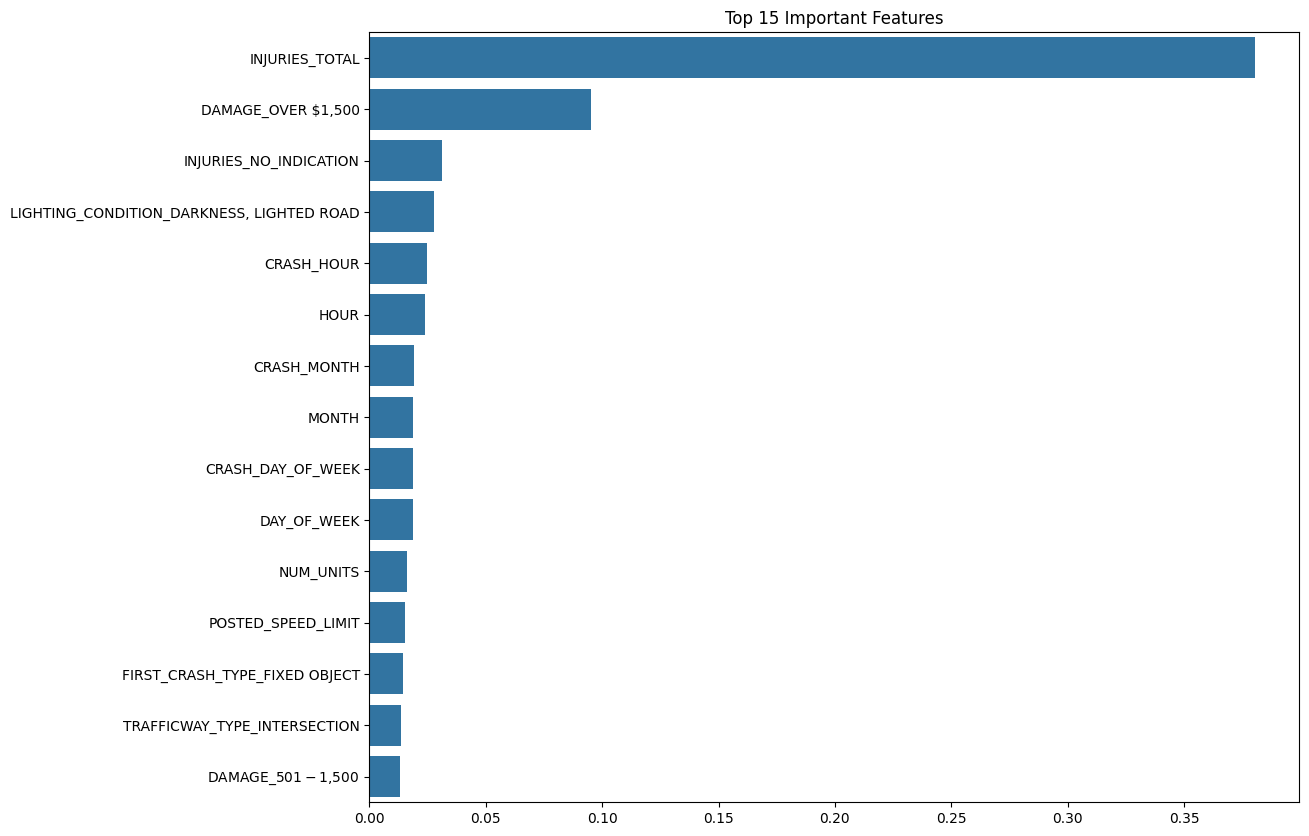

In [ ]:
#plotting the top 15 important Features of the Decision Tree of resampled data
plt.figure(figsize = (12,10))
sns.barplot(y=x_value[:15], x=y_value[:15])
plt.title("Top 15 Important Features")

<ipython-input-79-f3a866959963>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=x_value[:15], x=y_value[:15], palette=colors)


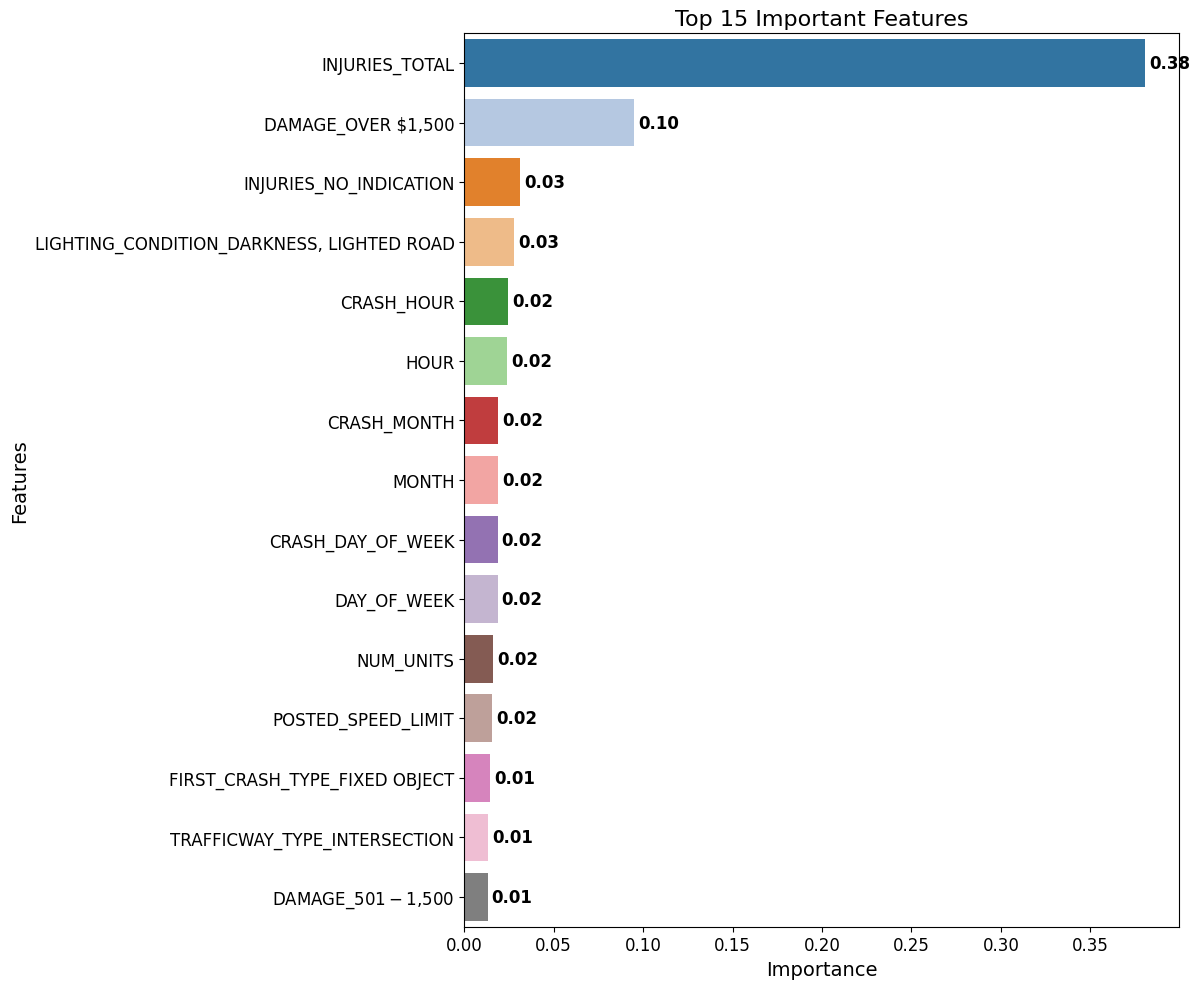

In [ ]:
# Create a unique color for each feature
colors = sns.color_palette('tab20', len(x_value[:15]))
# Plotting the top 15 important features
plt.figure(figsize=(12, 10))
barplot = sns.barplot(y=x_value[:15], x=y_value[:15], palette=colors)


for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', fontsize=12, padding=3, fontweight='bold')

# Adding labels and title
plt.title("Top 15 Important Features", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

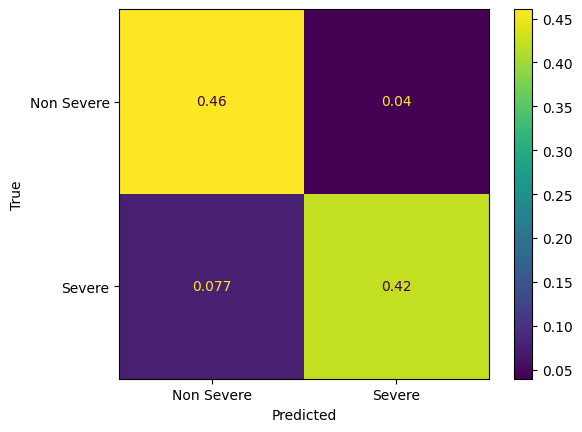

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_resampled_test, logreg_resampled_results, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Non Severe','Severe'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from collections import Counter

# Before resampling
print(f"Original dataset shape: {Counter(y_train)}")

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# After resampling
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({0: 515551, 1: 189501})


In [ ]:
# Train a Random Forest Classifier (or any other model)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = clf.predict(X_test)

In [ ]:
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8841505203581916
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92    161125
           1       0.85      0.69      0.76     59204

    accuracy                           0.88    220329
   macro avg       0.87      0.82      0.84    220329
weighted avg       0.88      0.88      0.88    220329

Confusion Matrix:
 [[153897   7228]
 [ 18297  40907]]
